In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('data_2.xlsx', sheet_name='618')

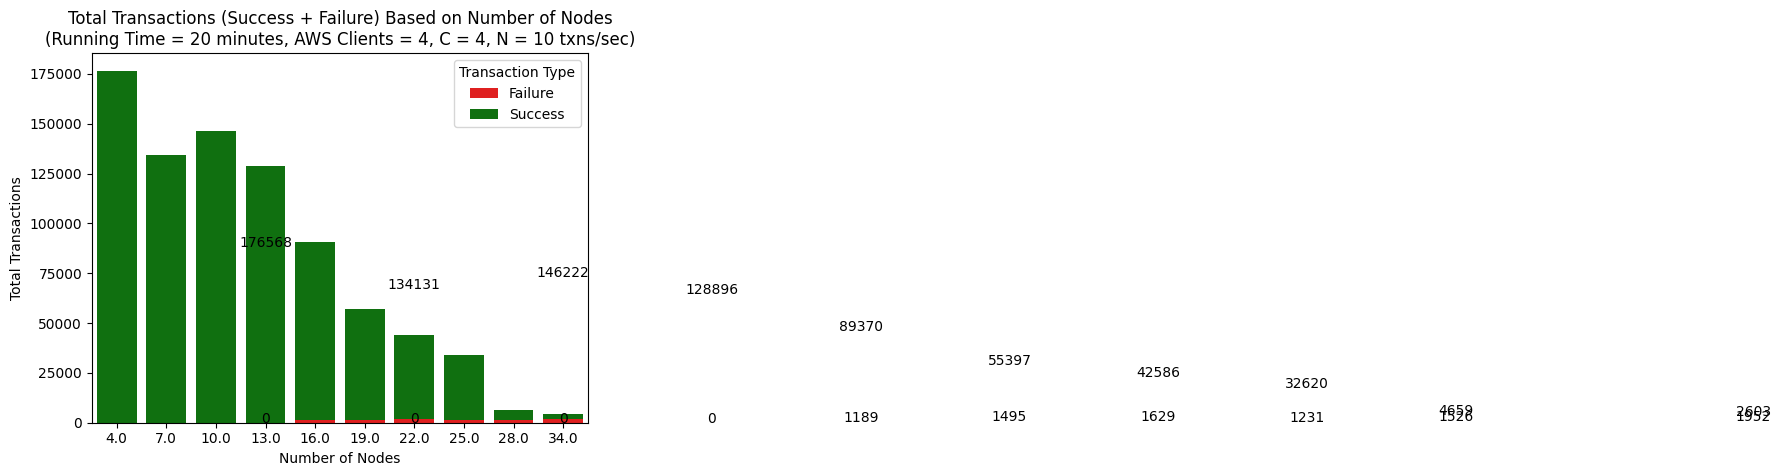

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summing Success and Failure for each Number of Nodes
summed_df = melted_df.pivot_table(index='Number of Nodes', columns='variable', values='value', aggfunc='sum').reset_index()

# Create a bar plot
fig, ax = plt.subplots()

sns.barplot(x='Number of Nodes', y='Failure', data=summed_df, color='red', label='Failure', ax=ax)
sns.barplot(x='Number of Nodes', y='Success', data=summed_df, color='green', label='Success', bottom=summed_df['Failure'], ax=ax)

# Add labels and title
ax.set_title('Total Transactions (Success + Failure) Based on Number of Nodes\n(Running Time = 20 minutes, AWS Clients = 4, C = 4, N = 10 txns/sec)')
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Total Transactions')

# Add data labels on bars
for index, row in summed_df.iterrows():
    ax.text(row['Number of Nodes'] - 1, row['Failure'] / 2, '{:.0f}'.format(row['Failure']), color='black', ha="center")
    ax.text(row['Number of Nodes'] - 1, row['Failure'] + row['Success'] / 2, '{:.0f}'.format(row['Success']), color='black', ha="center")

# Add legend
ax.legend(title='Transaction Type')

# Show the plot
plt.show()

In [3]:
df.drop(labels=10, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,AWS Clients,C,N,Running Time,Number of Nodes,Success,Failure
0,4.0,4.0,10.0,20 mins,4.0,147474.0,0.0
1,4.0,4.0,10.0,20 mins,7.0,134131.0,0.0
2,4.0,4.0,10.0,20 mins,10.0,146222.0,0.0
3,4.0,4.0,10.0,20 mins,13.0,128896.0,0.0
4,4.0,4.0,10.0,20 mins,16.0,89370.0,1189.0
5,4.0,4.0,10.0,20 mins,19.0,55397.0,1495.0
6,4.0,4.0,10.0,20 mins,22.0,42586.0,1629.0
7,4.0,4.0,10.0,20 mins,25.0,32620.0,1231.0
8,4.0,4.0,10.0,20 mins,28.0,4659.0,1526.0
9,4.0,4.0,10.0,20 mins,34.0,2603.0,1952.0


In [4]:
melted_df = pd.melt(df.loc[1:10, ['Number of Nodes', 'Success', 'Failure']], ['Number of Nodes'])

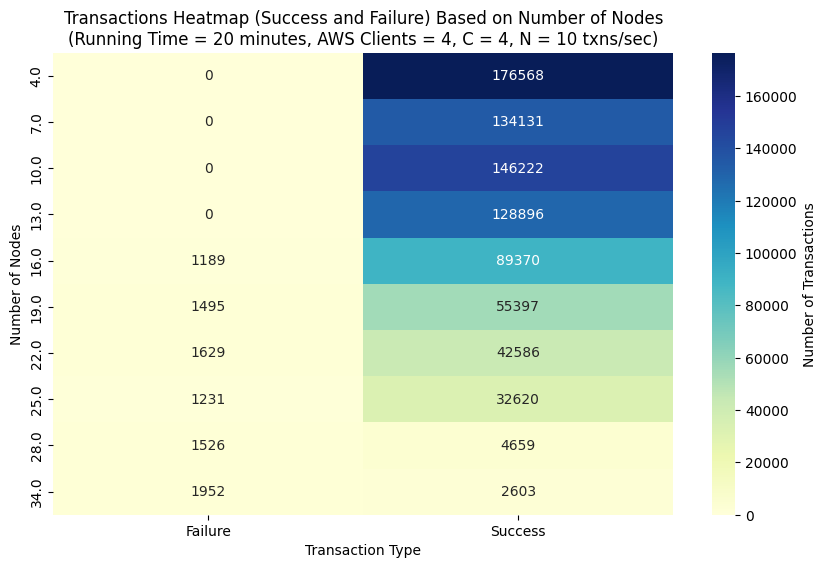

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summing Success and Failure for each Number of Nodes
heatmap_df = melted_df.pivot_table(index='Number of Nodes', columns='variable', values='value', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Transactions'})

# Add labels and title
plt.title('Transactions Heatmap (Success and Failure) Based on Number of Nodes\n(Running Time = 20 minutes, AWS Clients = 4, C = 4, N = 10 txns/sec)')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Nodes')

# Show the plot
plt.show()


In [7]:
melted_df

,Number of Nodes,variable,value
0,7.0,Success,134131.0
1,10.0,Success,146222.0
2,13.0,Success,128896.0
3,16.0,Success,89370.0
4,19.0,Success,55397.0
5,22.0,Success,42586.0
6,25.0,Success,32620.0
7,28.0,Success,4659.0
8,34.0,Success,2603.0
9,4.0,Success,176568.0


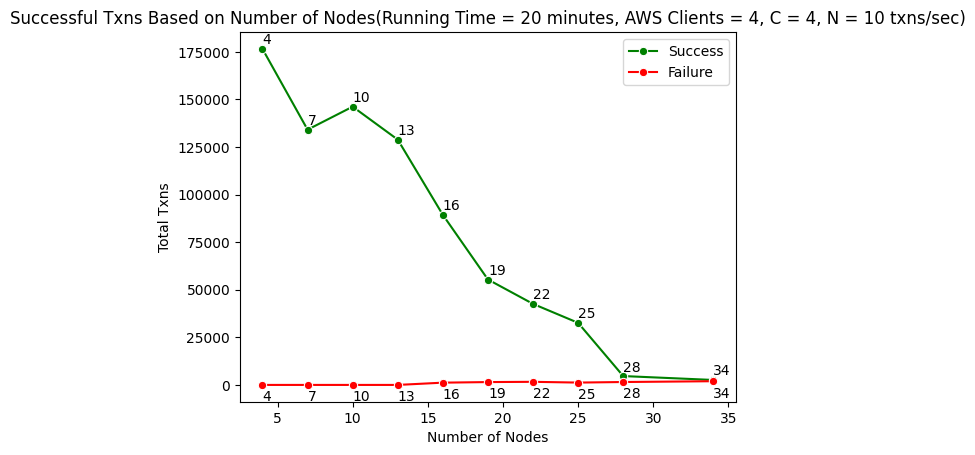

In [8]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data=melted_df, x='Number of Nodes', y='value', hue='variable', legend=True, marker="o", palette=['green', 'red'])
plot.title.set_text('Successful Txns Based on Number of Nodes(Running Time = 20 minutes, AWS Clients = 4, C = 4, N = 10 txns/sec)')

for x, y in zip(melted_df.loc[melted_df['variable'] == 'Success','Number of Nodes'], melted_df.loc[melted_df['variable'] == 'Success','value']):
    plt.text(x = x, # x-coordinate position of data label
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    y = y + 2500, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.0f}'.format(x), # data label, formatted to ignore decimals
    )

for x, y in zip(melted_df.loc[melted_df['variable'] == 'Failure', 'Number of Nodes'], melted_df.loc[melted_df['variable'] == 'Failure', 'value']):
    plt.text(x = x, # x-coordinate position of data label
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    y = y - 8500, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.0f}'.format(x), # data label, formatted to ignore decimals
    )

plot.set(ylabel='Total Txns')
_ = plot.legend(title='')

In [9]:
melted_df

,Number of Nodes,variable,value
0,7.0,Success,134131.0
1,10.0,Success,146222.0
2,13.0,Success,128896.0
3,16.0,Success,89370.0
4,19.0,Success,55397.0
5,22.0,Success,42586.0
6,25.0,Success,32620.0
7,28.0,Success,4659.0
8,34.0,Success,2603.0
9,4.0,Success,176568.0


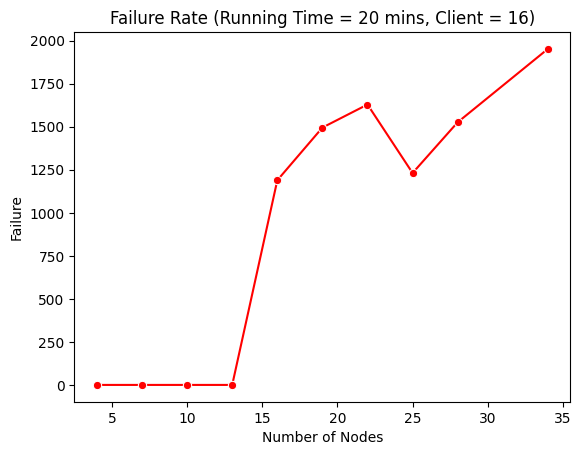

In [48]:
# sns.lineplot(data=df.iloc[:10], x='Number of Nodes', y='Failure', legend=True, marker="o", color='red').title.set_text('Failure Rate (Running Time = 20 mins, Client = 16)')